In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, cv2, itertools

In [2]:
levels      = [ 1.0, 0.5, 1.5 ]
adjustments = [ adj for adj in itertools.product(levels, levels, levels) ]

def adjust_image(input_image):
    h, w, c = input_image.shape
    images  = np.zeros((3 ** 3, h,w,c))

    for idx, (brightness, contrast, saturation) in enumerate(adjustments):
        input_hsv  = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV).astype(float)
        input_hsv *= np.array([ 1.0, saturation, 1.0 ])
        
        input_hsv[input_hsv > 255] = 255
        input_hsv[input_hsv < 0]   = 0

        input_rgb = cv2.cvtColor(input_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
        input_rgb = input_rgb * brightness + ((1-contrast) * 100)

        input_rgb[input_rgb > 255] = 255
        input_rgb[input_rgb < 0]   = 0

        images[idx] = input_rgb
    return images.astype(np.uint8)

(408, 612, 3)
Finished in 0.37 seconds


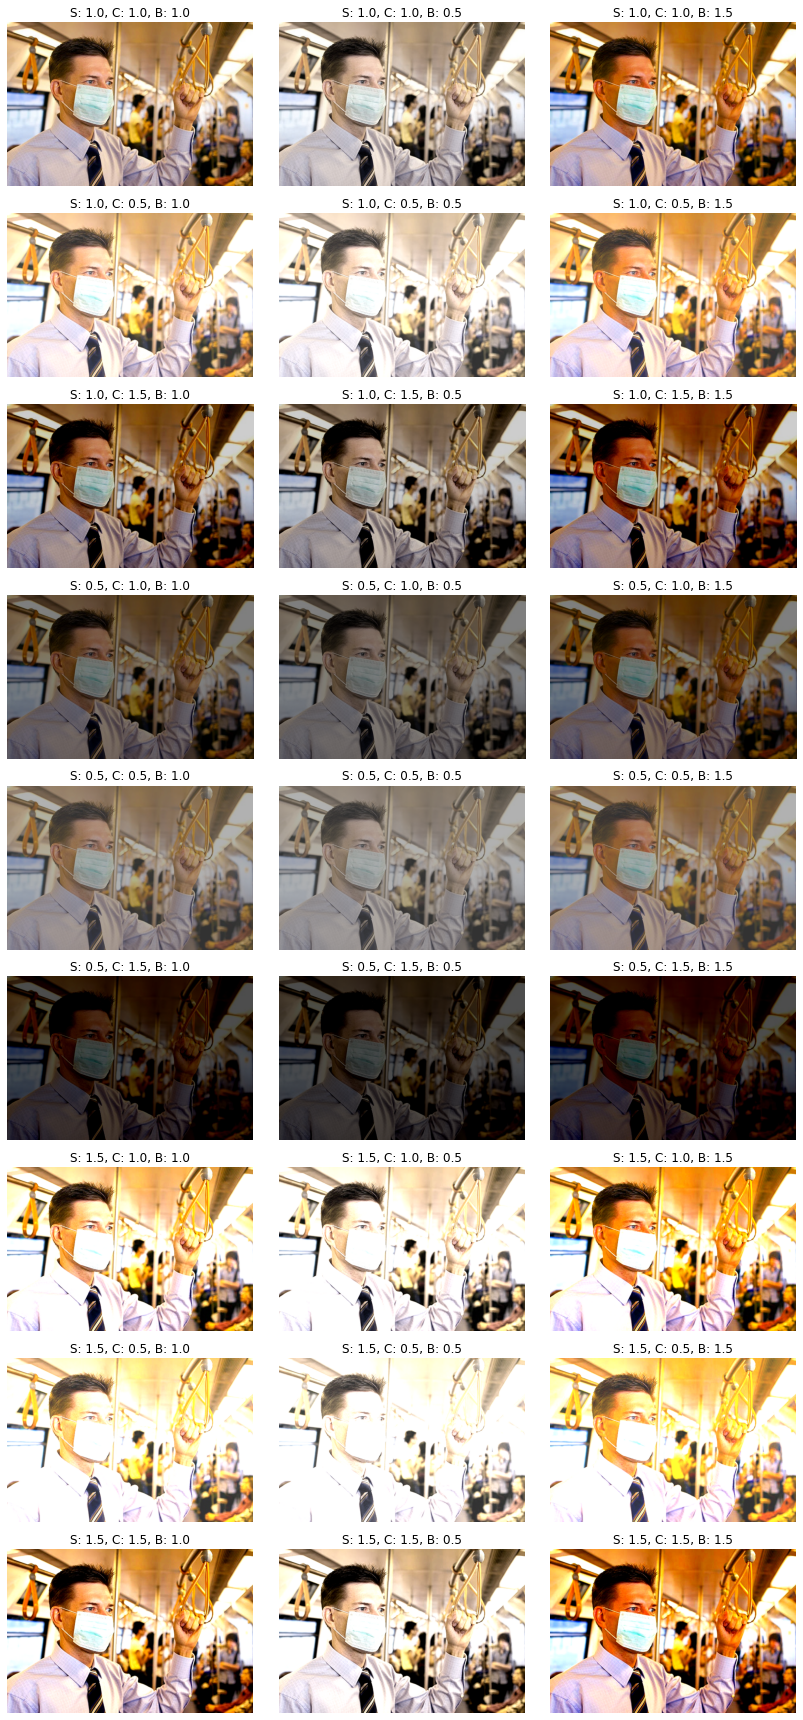

In [3]:
# For testing purposes
IMG_DIR     = '../DatasetCleaning/Sortedface_with_mask'
IMAGE_FILES = [ os.path.join(IMG_DIR, x) for x in os.listdir(IMG_DIR) ]

test_image = cv2.cvtColor(cv2.imread(IMAGE_FILES[0]), cv2.COLOR_BGR2RGB)
print(test_image.shape)

beg = time.perf_counter()
adjusted_imgs = adjust_image(test_image)
end = time.perf_counter()

print('Finished in {:.2f} seconds'.format(end - beg))

fig, ax = plt.subplots(9, 3, figsize=(12,24))
for idx, img in enumerate(adjusted_imgs):
    plt_row  = idx // 3
    plt_col  = idx % 3
    
    title = 'S: {}, C: {}, B: {}'.format(adjustments[idx][0],
                                         adjustments[idx][1],
                                         adjustments[idx][2])
    ax[plt_row, plt_col].set_title(title)
    ax[plt_row, plt_col].imshow(img)
    ax[plt_row, plt_col].axis('off')

plt.subplots_adjust(wspace=0, hspace=None)
plt.tight_layout()
plt.show()